In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch

In [2]:
def generate_shift_one_dim_dataset(n, p, q, seed):
    rng = np.random.RandomState(seed)
    
    us1 = rng.binomial(n=1, p=q, size=int(n * p))
    xs1 = rng.uniform(0.0, 10.0, size=int(n * p))
    noise1 = rng.normal(0.0, 20.0, size=int(n * p))
    ys1 = xs1 * xs1 * xs1 + 1 * xs1 * xs1 * xs1 * us1 + noise1
    
    us2 = rng.binomial(n=1, p=q, size=int(n * (1 - p)))
    xs2 = rng.uniform(0.0, 1.0, size=int(n * (1 - p)))
    noise2 = rng.normal(0.0, 20.0, size=int(n * (1 - p)))
    ys2 = xs2 * xs2 * xs2 + 1 * xs2 * xs2 * xs2 * us2 + noise2
    
    xs = np.concatenate((xs1, xs2))
    ys = np.concatenate((ys1, ys2))
    return xs.reshape(-1, 1), ys.reshape(-1, 1)

In [3]:
p_tests = [1, 0.1]
q_tests = [0.1, 0.9]

data = []
for j in range(len(q_tests)):
    for i in range(len(p_tests)):
        x, y= generate_shift_one_dim_dataset(n=750, p=p_tests[i], q=q_tests[j], seed=0)
        data.append((x, y))

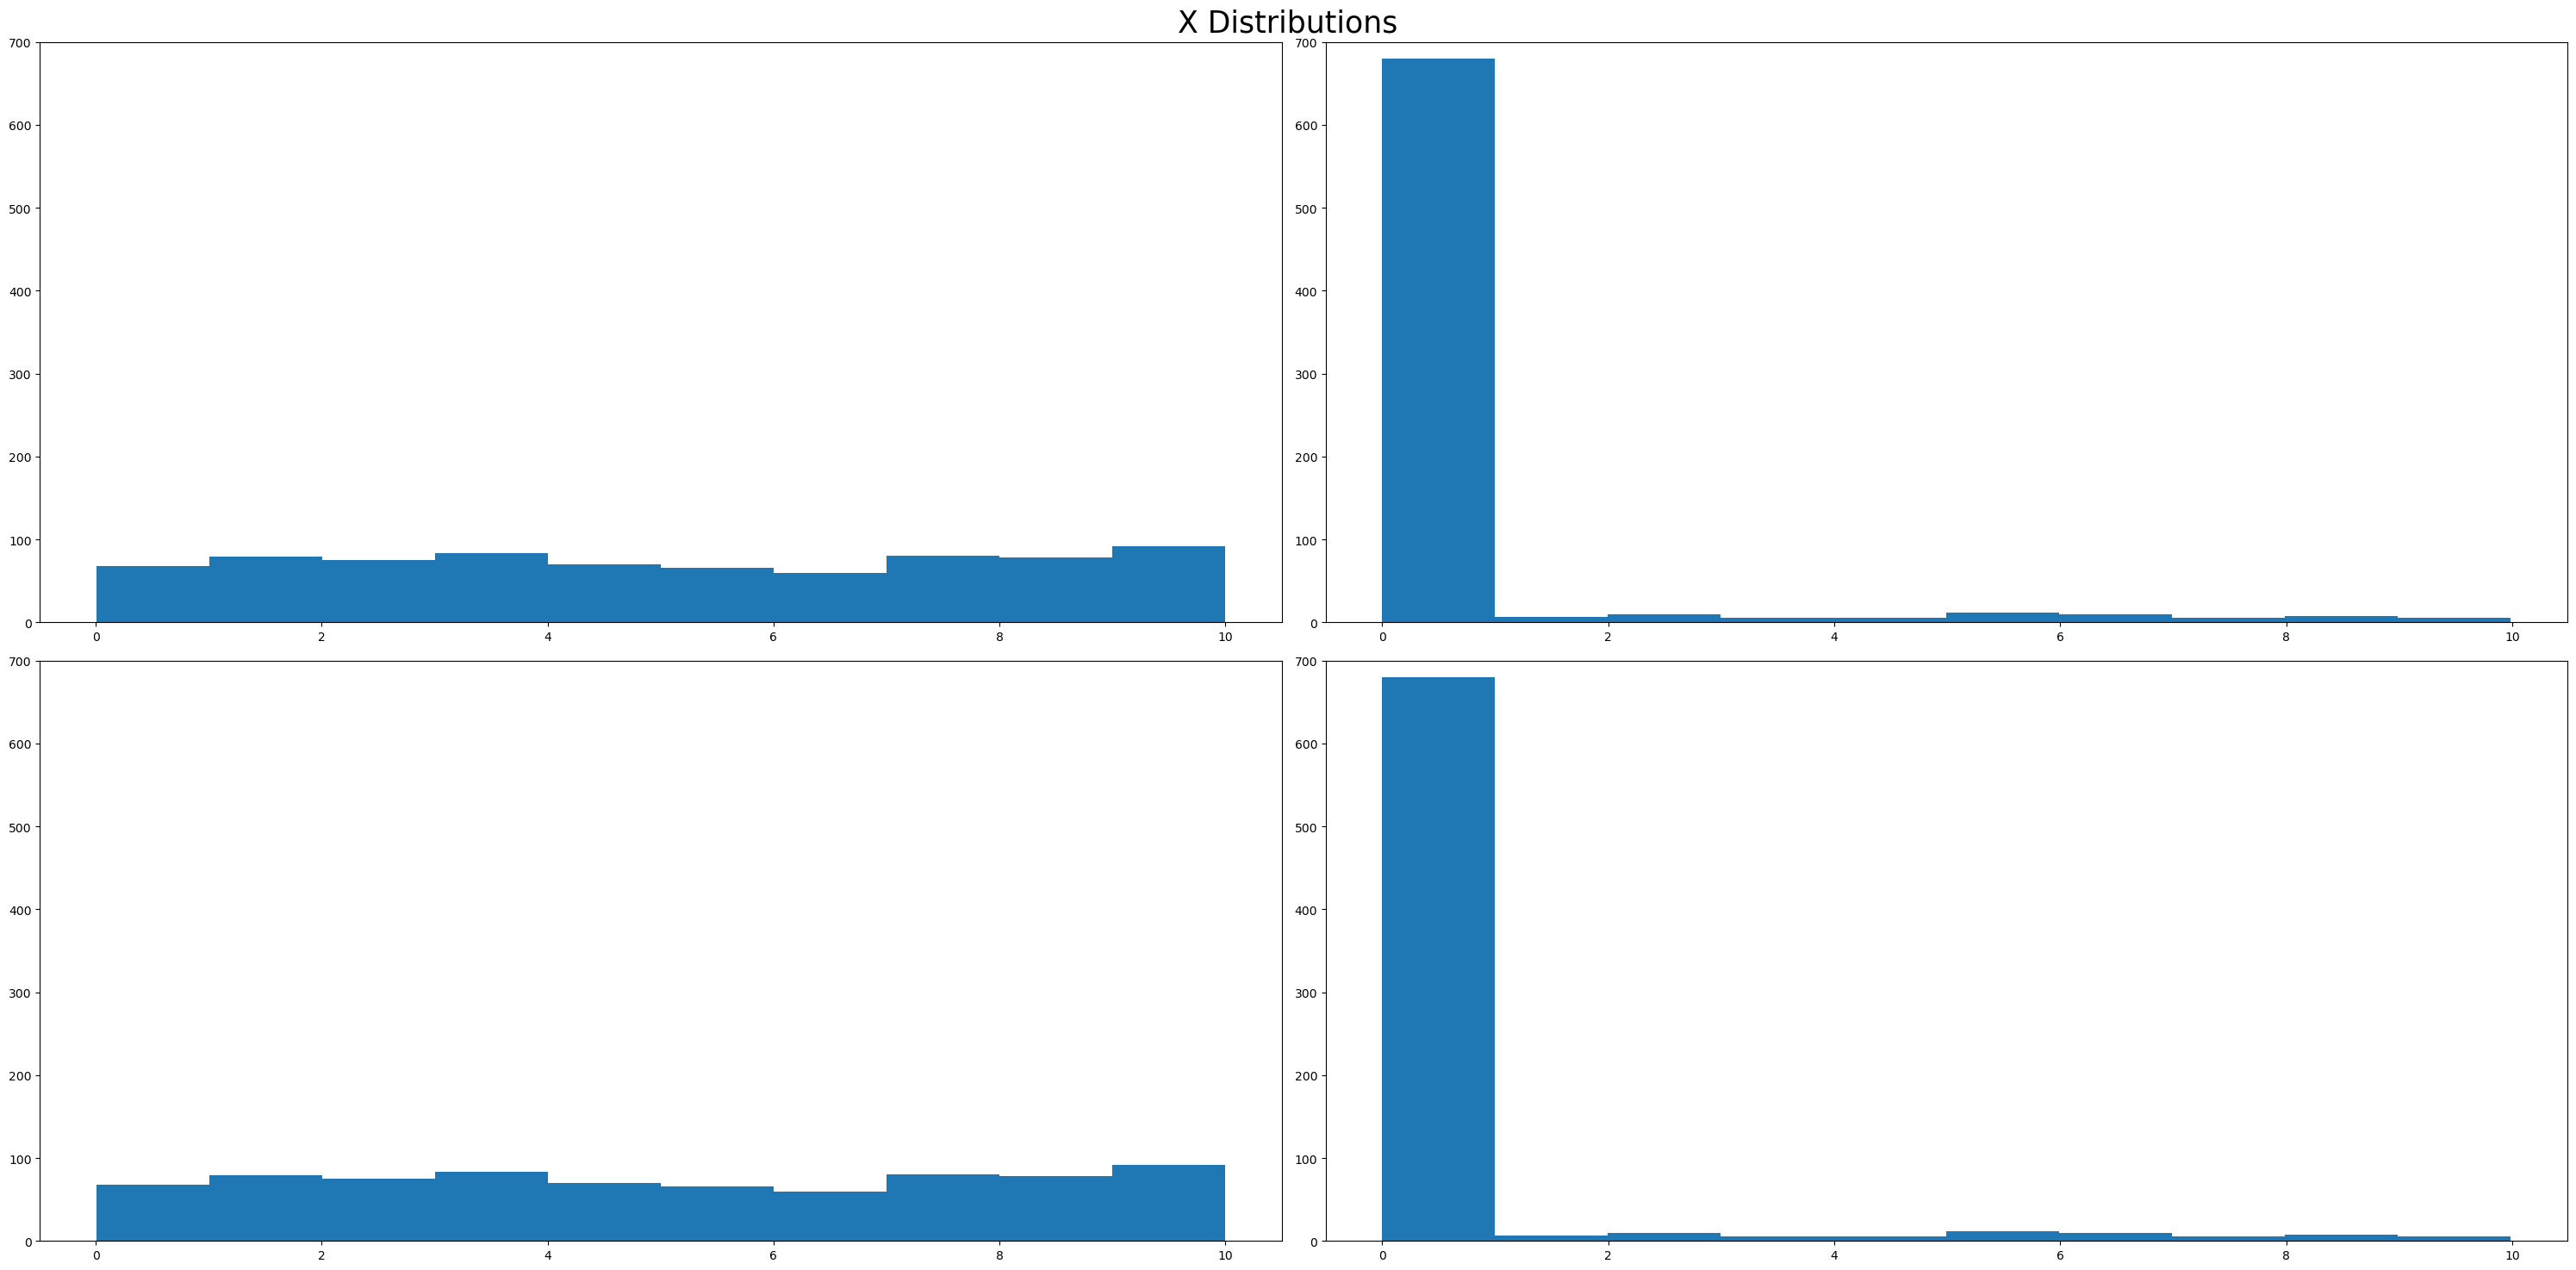

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
ax = ax.flatten()
for i in range(len(data)):
    ax[i].hist(data[i][0])
    ax[i].set_ylim(0, 700)
plt.suptitle("X Distributions", fontsize=25)
plt.tight_layout()

[[101.12201053]]
[[68.0489283]]
[[177.8349691]]
[[115.75119268]]


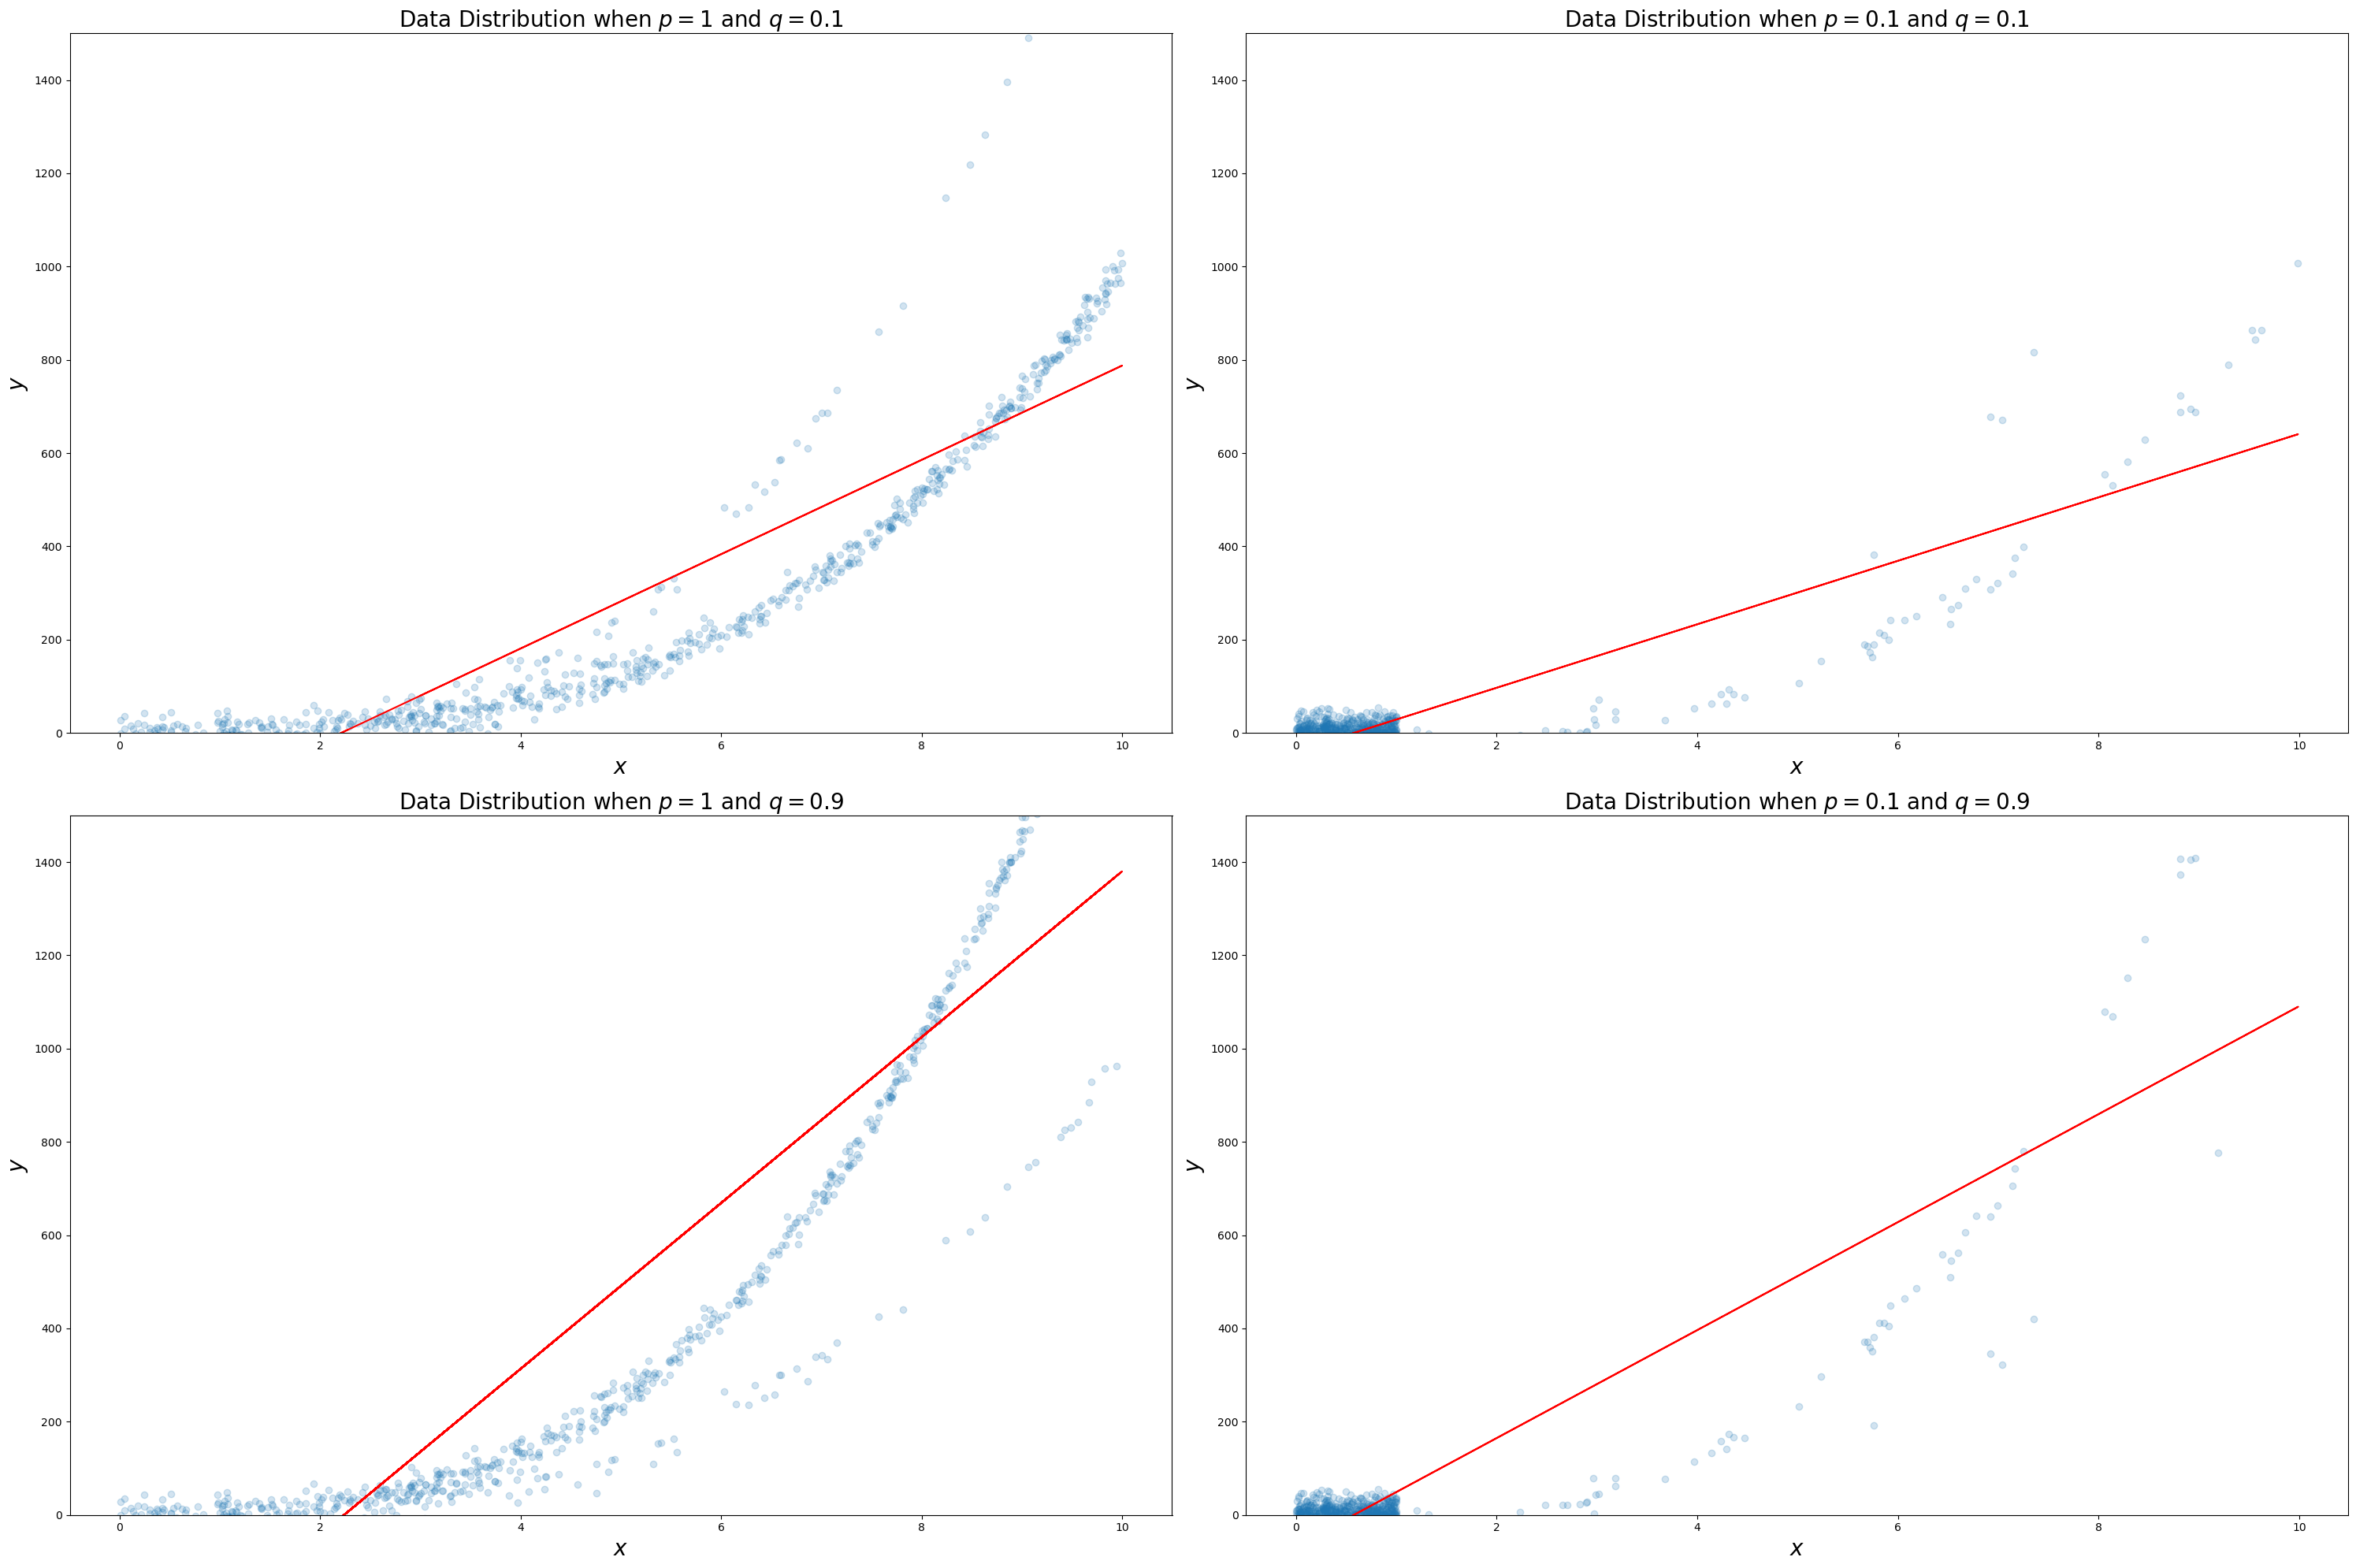

In [6]:
fig2, ax2 = plt.subplots(2, 2, figsize=(30, 20))
ax2 = ax2.flatten();
for i in range(len(data)):
    ax2[i].scatter(data[i][0], data[i][1], alpha=0.2)
    ax2[i].set_title("Data Distribution when " + r"$p={}$".format(round(p_tests[i % 2], 3)) + " and " + r"$q={}$".format(round(q_tests[int(i / 2)], 3)), fontsize=20)
    ax2[i].set_xlabel(r"$x$", fontsize=20)
    ax2[i].set_ylabel(r"$y$", fontsize=20)
    ax2[i].set_ylim(0, 1500)
    model = LinearRegression()
    model.fit(data[i][0], data[i][1])
    print(model.coef_)
    y_pred = model.predict(data[i][0])
    mse = mean_squared_error(data[i][1], y_pred)
    ax2[i].plot(data[i][0], y_pred, color='red', label='Linear Regression')
plt.tight_layout()